In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json
from tqdm import tqdm
import os

import datetime
import arrow
import time

# Load data

See the scraping notebook for data but sales come from https://kittysales.herokuapp.com, genetics come from data on the etherium contract

## Load sales data

In [58]:
sales_data_file = '.cache/sales.json'
sales = json.load(open(sales_data_file))
len(sales)
sales['sales'][0]

{'blockNumber': 4688676,
 'blocktimeStamp': 1512617298,
 'id': 'log_9357a0df',
 'rank': 1,
 'returnValues': {'0': '18',
  '1': '253336776620370370370',
  '2': '0xA6d3fdf423BbC578dd4d41220078475371626B22'},
 'soldPrice': 115197.04572803818}

In [129]:
# convert to dataframe
df = pd.DataFrame(sales['sales'])

# convert to pandas timestamp
datetimes = df['blocktimeStamp'].apply(datetime.datetime.fromtimestamp)
df['date'] = pd.to_datetime(datetimes)

# grab some of the fields under return values for the dataframe
df2=pd.DataFrame.from_records(df['returnValues'].values)
df2.columns=['kitty_id','price_18eth','address']
df2['price_eth']=df2['price_18eth'].apply(lambda x:float(x)*1e-18)
df2['kitty_id'] = pd.to_numeric(df2['kitty_id'])
for col in ['kitty_id','price_eth']:
    df[col] = df2[col]
    
# rename cols
df['soldPrice'] = df['soldPrice'].rename('soldPrice_USD')
df = df.rename(columns={"soldPrice":"sold_price_usd"})
df.index = df['kitty_id']

# drop uneeded columns
df = df.drop(['id', 'blockNumber', 'rank', 'returnValues', 'blocktimeStamp'], axis=1)
df_sales = df
df_sales

,sold_price_usd,date,kitty_id,price_eth
kitty_id,,,,
18,1.151970e+05,2017-12-07 11:28:18,18,2.533368e+02
4,1.123156e+05,2017-12-07 03:41:57,4,2.470000e+02
1,1.144816e+05,2017-12-03 04:32:36,1,2.469255e+02
21,1.080061e+05,2017-12-08 17:31:03,21,2.375228e+02
22,1.023118e+05,2017-12-08 17:34:36,22,2.250000e+02
5,1.016005e+05,2017-12-06 00:45:01,5,2.220000e+02
7,8.767734e+04,2017-12-05 03:45:47,7,1.900468e+02
35,8.500053e+04,2017-12-06 15:18:02,35,1.888897e+02
87,8.142809e+04,2017-12-07 02:11:42,87,1.790734e+02


# Load genetic data

In [109]:
genetics_file = '.cache/genes.json'
genetics = json.load(open(genetics_file))
len(genetics)

43488

In [496]:
# convert to dataframe
df = pd.DataFrame.from_dict(genetics).T
df.columns=['is_gestating', 'is_ready', 'cooldown_index', 'next_action_at', 'siring_with_id', 'birth_time', 'matron_id', 'sire_id', 'generation', 'genes']
df.index = pd.to_numeric(df.index)
df['generation'] = pd.to_numeric(df['generation'])
df['matron_id'] = pd.to_numeric(df['matron_id'])
df['sire_id'] = pd.to_numeric(df['sire_id'])
df['birth_time'] = pd.to_numeric(df['birth_time'])
df = df.sort_index()
df = df.drop(['is_gestating', 'is_ready', 'cooldown_index', 'next_action_at', 'siring_with_id'], axis=1)
df = df[df.genes!='0'] # remove rows with no genes
df = df[1:] # remove origin kitty
df_genetics = df
df_genetics

,birth_time,matron_id,sire_id,generation,genes
1,1511417999,0,0,0,6268376211548016160889809226598771686091543863...
2,1511417999,0,0,0,6233328247424174420738016520205540105237269755...
3,1511417999,0,0,0,5163523354162354170567022901547386224918079227...
4,1511417999,0,0,0,6268375141947334719316716288420757560178523965...
5,1511417999,0,0,0,6233328806923846998926376260807366625937483650...
6,1511417999,0,0,0,4613035485150908523120757036068930199538348135...
7,1511417999,0,0,0,6233277698034429017103950567765524970954426879...
8,1511418008,0,0,0,4559620020693848583707206074171681675830775819...
9,1511418035,0,0,0,6233833779874278041852346338088492342734244547...
10,1511418044,0,0,0,5163523337171367126011753839819537067276020035...


## Merge & convert genes from int to bits

In [518]:
def genestr_to_bits(x):
    """Gene data is a uint256 string, but I think the genes are it's bytes so lets convert to a bit array"""
    bits = bin(int(x))[2:]
    bitarray = [1 if b=='1' else 0 for b in bits]
    bitarray = (256-len(bitarray))*[0] + bitarray # pad
    return bitarray

In [692]:
# merge and add parent genes
df = pd.merge(df_genetics, df_sales, how='inner', left_index=True, right_index=True)
df

# remove rows where we don't have the parent genetics
mask1 = df['sire_id'].apply(lambda x:int(x) in df_genetics.index)
mask2 = df['matron_id'].apply(lambda x:int(x) in df_genetics.index)
df = df[mask1*mask2]

# remove generation 0
df = df[df['generation']>0]
len(df)

df['sire_genes']=df['sire_id'].apply(lambda x:df_genetics.loc[x].genes).apply(genestr_to_bits)
df['sire_gen']=df['sire_id'].apply(lambda x:df_genetics.loc[x].generation)
df['matron_genes']=df['matron_id'].apply(lambda x:df_genetics.loc[x].genes).apply(genestr_to_bits)
df['matron_gen']=df['matron_id'].apply(lambda x:df_genetics.loc[x].generation)
df['genes']=df['genes'].apply(genestr_to_bits)

df

/home/wassname/.pyenv/versions/3.5.3/envs/jupyter3/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,birth_time,matron_id,sire_id,generation,genes,sold_price_usd,date,kitty_id,price_eth,sire_genes,sire_gen,matron_genes,matron_gen
3005,1511466911,1045,1003,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",75.475318,2017-12-02 05:08:56,3005,0.160056,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3007,1511466918,1044,1006,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",101.317700,2017-12-03 00:22:07,3007,0.220000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3008,1511466918,1097,1099,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.555534,2017-11-24 08:25:32,3008,0.013552,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",23.645100,2017-11-29 07:17:53,3010,0.050000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.974763,2017-11-30 06:41:14,3010,0.022729,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.200592,2017-11-24 04:15:04,3010,0.009996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3011,1511467040,1093,1099,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.281243,2017-11-24 06:00:39,3011,0.014819,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",478.842000,2017-12-04 00:15:11,3012,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",399.712992,2017-12-05 09:53:38,3012,0.856569,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.096416,2017-11-24 10:23:41,3012,0.009984,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


# Collect training data

In [674]:
# parent genes
X = np.array([df['sire_genes'], df['matron_genes']])
X = np.transpose(X, (1,2,0))

# child genes
Y = np.stack(df['genes'].values)
X.shape, Y.shape

((27727, 256, 2), (27727, 256))

In [675]:
# split into test and train, val (& shuffle)
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, random_state=42, test_size=0.1)
X_train.shape, y_train.shape

((24954, 256, 2), (24954, 256))

In [676]:
# # NOTE: there is ~50% overlap between test and train y values :( because of repeated breeding
# # For now I'll just leave it and try to get an accuracy higher than the overlap

# # check for overlap
# overlaps = []
# for y in tqdm(y_test[:1000]):
#     overlaps.append(((y - y_train)==0).all(-1).sum()>0)
# overlaps = np.array(overlaps)
# print('overlap fraction', overlaps.sum()/len(overlaps))

# Baseline performance

How easy is this problem? Lets see how well dummy models do

http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [681]:
from sklearn.dummy import DummyClassifier
for strategy in ['stratified', 'prior', 'uniform', 'most_frequent']:
    clf = DummyClassifier(strategy=strategy, random_state=0)
    clf.fit(X_train.reshape((-1,512)), y_train)
    acc = clf.score(X_test.reshape((-1,512)), y_test)
    
    y_pred = clf.predict(X_test.reshape((-1,512)))
    loss = sklearn.metrics.log_loss(y_test, y_pred)
    print(strategy,'loss',loss,'accuracy',acc)

stratified loss 1666.43792773 accuracy 0.0
prior loss 1166.88507952 accuracy 0.0
uniform loss 2205.66894511 accuracy 0.0
most_frequent loss 1166.88507952 accuracy 0.0


# Train

In [592]:
import keras

In [595]:
# Simple model with two layers
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((256,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='elu'))
model.add(keras.layers.Dense(256, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 256, 2)            0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
Total params: 197,120
Trainable params: 197,120
Non-trainable params: 0
_________________________________________________________________


In [596]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Train on 19963 samples, validate on 4991 samples
Epoch 1/500
19963/19963 [==============================] - 4s - loss: 509.6478 - acc: 0.2359 - val_loss: 505.6140 - val_acc: 0.0950
Epoch 2/500
19963/19963 [==============================] - 4s - loss: 503.6146 - acc: 0.0947 - val_loss: 503.8711 - val_acc: 0.1052
Epoch 3/500
19963/19963 [==============================] - 4s - loss: 502.3385 - acc: 0.1134 - val_loss: 503.3724 - val_acc: 0.2637
Epoch 4/500
19963/19963 [==============================] - 3s - loss: 501.8278 - acc: 0.2307 - val_loss: 503.1031 - val_acc: 0.3264
Epoch 5/500
19963/19963 [==============================] - 3s - loss: 501.5010 - acc: 0.3075 - val_loss: 503.0677 - val_acc: 0.3364
Epoch 6/500
19963/19963 [==============================] - 3s - loss: 501.2706 - acc: 0.3177 - val_loss: 502.9476 - val_acc: 0.3881
Epoch 7/500
19963/19963 [==============================] - 3s - loss: 501.1096 - acc: 0.2912 - val_loss: 502.9000 - val_acc: 0.2176
Epoch 8/500
19963/19963 [==

19963/19963 [==============================] - 4s - loss: 496.6298 - acc: 0.6739 - val_loss: 505.6031 - val_acc: 0.5893
Epoch 63/500
19963/19963 [==============================] - 4s - loss: 496.5867 - acc: 0.6749 - val_loss: 505.6839 - val_acc: 0.6959
Epoch 64/500
19963/19963 [==============================] - 4s - loss: 496.5602 - acc: 0.6896 - val_loss: 505.7272 - val_acc: 0.6295
Epoch 65/500
19963/19963 [==============================] - 4s - loss: 496.5212 - acc: 0.6915 - val_loss: 505.9080 - val_acc: 0.7077
Epoch 66/500
19963/19963 [==============================] - 4s - loss: 496.4646 - acc: 0.7001 - val_loss: 505.9090 - val_acc: 0.6872
Epoch 67/500
19963/19963 [==============================] - 4s - loss: 496.4422 - acc: 0.7116 - val_loss: 506.0468 - val_acc: 0.6922
Epoch 68/500
19963/19963 [==============================] - 4s - loss: 496.4119 - acc: 0.7199 - val_loss: 505.9182 - val_acc: 0.7652
Epoch 69/500
19963/19963 [==============================] - 4s - loss: 496.3752 - 

19963/19963 [==============================] - 4s - loss: 495.1186 - acc: 0.8851 - val_loss: 508.7714 - val_acc: 0.8730
Epoch 124/500
19963/19963 [==============================] - 4s - loss: 495.1231 - acc: 0.8882 - val_loss: 508.4651 - val_acc: 0.8978
Epoch 125/500
19963/19963 [==============================] - 4s - loss: 495.1060 - acc: 0.8877 - val_loss: 509.0085 - val_acc: 0.9203
Epoch 126/500
19963/19963 [==============================] - 4s - loss: 495.0852 - acc: 0.8858 - val_loss: 508.9583 - val_acc: 0.8499
Epoch 127/500
19963/19963 [==============================] - 4s - loss: 495.0680 - acc: 0.8819 - val_loss: 508.7727 - val_acc: 0.8784
Epoch 128/500
19963/19963 [==============================] - 4s - loss: 495.0595 - acc: 0.8847 - val_loss: 508.9968 - val_acc: 0.8786
Epoch 129/500
19963/19963 [==============================] - 4s - loss: 495.0271 - acc: 0.8868 - val_loss: 508.9998 - val_acc: 0.8511
Epoch 130/500
19963/19963 [==============================] - 4s - loss: 495.

19963/19963 [==============================] - 4s - loss: 494.3424 - acc: 0.9300 - val_loss: 512.0930 - val_acc: 0.9217
Epoch 185/500
19963/19963 [==============================] - 4s - loss: 494.3438 - acc: 0.9284 - val_loss: 510.9834 - val_acc: 0.9269
Epoch 186/500
19963/19963 [==============================] - 4s - loss: 494.3195 - acc: 0.9291 - val_loss: 511.9937 - val_acc: 0.9126
Epoch 187/500
19963/19963 [==============================] - 4s - loss: 494.3074 - acc: 0.9290 - val_loss: 511.9741 - val_acc: 0.9074
Epoch 188/500
19963/19963 [==============================] - 4s - loss: 494.3191 - acc: 0.9289 - val_loss: 511.4462 - val_acc: 0.9337
Epoch 189/500
19963/19963 [==============================] - 4s - loss: 494.2997 - acc: 0.9299 - val_loss: 511.5951 - val_acc: 0.9223
Epoch 190/500
19963/19963 [==============================] - 4s - loss: 494.2854 - acc: 0.9302 - val_loss: 511.7262 - val_acc: 0.9253
Epoch 191/500
19963/19963 [==============================] - 4s - loss: 494.

19963/19963 [==============================] - 4s - loss: 493.8071 - acc: 0.9487 - val_loss: 514.3960 - val_acc: 0.9405
Epoch 246/500
19963/19963 [==============================] - 4s - loss: 493.8041 - acc: 0.9489 - val_loss: 514.0023 - val_acc: 0.9319
Epoch 247/500
19963/19963 [==============================] - 4s - loss: 493.7912 - acc: 0.9510 - val_loss: 514.8714 - val_acc: 0.9495
Epoch 248/500
19963/19963 [==============================] - 4s - loss: 493.8028 - acc: 0.9486 - val_loss: 514.3183 - val_acc: 0.9349
Epoch 249/500
19963/19963 [==============================] - 4s - loss: 493.7943 - acc: 0.9494 - val_loss: 514.6188 - val_acc: 0.9337
Epoch 250/500
19963/19963 [==============================] - 4s - loss: 493.7955 - acc: 0.9485 - val_loss: 514.5264 - val_acc: 0.9413
Epoch 251/500
19963/19963 [==============================] - 4s - loss: 493.7814 - acc: 0.9492 - val_loss: 514.4235 - val_acc: 0.9405
Epoch 252/500
19963/19963 [==============================] - 4s - loss: 493.

19963/19963 [==============================] - 4s - loss: 493.4076 - acc: 0.9568 - val_loss: 516.4242 - val_acc: 0.9547
Epoch 307/500
19963/19963 [==============================] - 4s - loss: 493.3829 - acc: 0.9559 - val_loss: 516.8223 - val_acc: 0.9595
Epoch 308/500
19963/19963 [==============================] - 4s - loss: 493.4070 - acc: 0.9561 - val_loss: 516.5648 - val_acc: 0.9583
Epoch 309/500
19963/19963 [==============================] - 4s - loss: 493.3681 - acc: 0.9577 - val_loss: 516.8094 - val_acc: 0.9447
Epoch 310/500
19963/19963 [==============================] - 4s - loss: 493.3924 - acc: 0.9562 - val_loss: 517.5253 - val_acc: 0.9625
Epoch 311/500
19963/19963 [==============================] - 4s - loss: 493.3689 - acc: 0.9560 - val_loss: 517.4248 - val_acc: 0.9511
Epoch 312/500
19963/19963 [==============================] - 4s - loss: 493.3694 - acc: 0.9569 - val_loss: 516.7473 - val_acc: 0.9561
Epoch 313/500
19963/19963 [==============================] - 4s - loss: 493.

19963/19963 [==============================] - 4s - loss: 493.0873 - acc: 0.9627 - val_loss: 518.8594 - val_acc: 0.9633
Epoch 368/500
19963/19963 [==============================] - 4s - loss: 493.0917 - acc: 0.9612 - val_loss: 519.3507 - val_acc: 0.9679
Epoch 369/500
19963/19963 [==============================] - 4s - loss: 493.0565 - acc: 0.9628 - val_loss: 519.6654 - val_acc: 0.9619
Epoch 370/500
19963/19963 [==============================] - 4s - loss: 493.0800 - acc: 0.9632 - val_loss: 518.6537 - val_acc: 0.9513
Epoch 371/500
19963/19963 [==============================] - 4s - loss: 493.0608 - acc: 0.9632 - val_loss: 518.9980 - val_acc: 0.9601
Epoch 372/500
19963/19963 [==============================] - 4s - loss: 493.0509 - acc: 0.9627 - val_loss: 519.6773 - val_acc: 0.9601
Epoch 373/500
19963/19963 [==============================] - 4s - loss: 493.0621 - acc: 0.9632 - val_loss: 519.5024 - val_acc: 0.9635
Epoch 374/500
19963/19963 [==============================] - 4s - loss: 493.

19963/19963 [==============================] - 4s - loss: 492.8158 - acc: 0.9660 - val_loss: 521.3631 - val_acc: 0.9657
Epoch 429/500
19963/19963 [==============================] - 4s - loss: 492.7940 - acc: 0.9673 - val_loss: 521.3855 - val_acc: 0.9579
Epoch 430/500
19963/19963 [==============================] - 4s - loss: 492.8105 - acc: 0.9680 - val_loss: 521.1384 - val_acc: 0.9579
Epoch 431/500
19963/19963 [==============================] - 4s - loss: 492.7924 - acc: 0.9676 - val_loss: 521.3082 - val_acc: 0.9645
Epoch 432/500
19963/19963 [==============================] - 4s - loss: 492.8049 - acc: 0.9670 - val_loss: 520.9568 - val_acc: 0.9689
Epoch 433/500
19963/19963 [==============================] - 4s - loss: 492.8227 - acc: 0.9676 - val_loss: 520.5832 - val_acc: 0.9647
Epoch 434/500
19963/19963 [==============================] - 4s - loss: 492.7795 - acc: 0.9664 - val_loss: 521.5889 - val_acc: 0.9705
Epoch 435/500
19963/19963 [==============================] - 4s - loss: 492.

19963/19963 [==============================] - 4s - loss: 492.5984 - acc: 0.9722 - val_loss: 523.0990 - val_acc: 0.9693
Epoch 490/500
19963/19963 [==============================] - 4s - loss: 492.5692 - acc: 0.9723 - val_loss: 523.1680 - val_acc: 0.9687
Epoch 491/500
19963/19963 [==============================] - 4s - loss: 492.5955 - acc: 0.9722 - val_loss: 523.1605 - val_acc: 0.9711
Epoch 492/500
19963/19963 [==============================] - 4s - loss: 492.5674 - acc: 0.9730 - val_loss: 523.5230 - val_acc: 0.9709
Epoch 493/500
19963/19963 [==============================] - 4s - loss: 492.5607 - acc: 0.9719 - val_loss: 522.4805 - val_acc: 0.9705
Epoch 494/500
19963/19963 [==============================] - 4s - loss: 492.5855 - acc: 0.9726 - val_loss: 524.0435 - val_acc: 0.9701
Epoch 495/500
19963/19963 [==============================] - 4s - loss: 492.5620 - acc: 0.9731 - val_loss: 522.9716 - val_acc: 0.9657
Epoch 496/500
19963/19963 [==============================] - 4s - loss: 492.

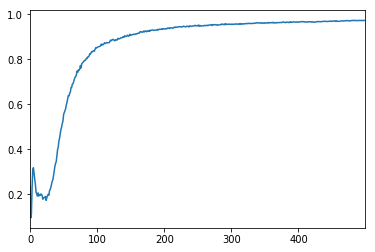

In [600]:
pd.DataFrame(history.history)['acc'].plot()

In [601]:
metrics = model.evaluate(X_test,y_test)
metrics = dict(zip(model.metrics_names, metrics))
metrics

2592/2773 [===========================>..] - ETA: 0s

{'acc': 0.96393797331410025, 'loss': 522.92700998696273}

# Predict child price

The prices are not normally distributed in linear space. But in log space they are, so lets predict log price.

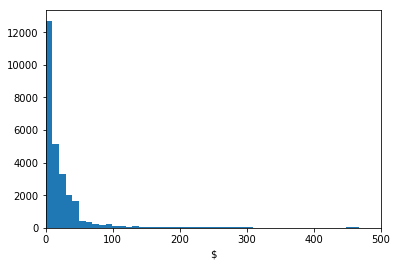

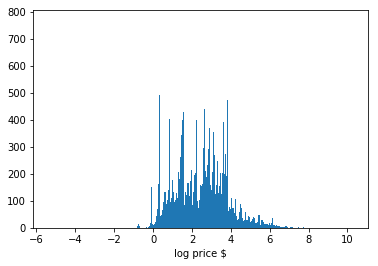

In [766]:
prices = df['sold_price_usd']
prices = prices[prices<500]
plt.hist(prices, bins=50)
plt.xlabel('$')
plt.xlim(0, 500)
plt.show()

plt.hist(np.log(df['sold_price_usd']), bins=50)
plt.xlabel('log price $')
plt.show()

In [843]:
# For predicting price lets uses parent generation, genes, and birth time
# We will normalize them by constants to ~0 to ~1
sire_genes = np.array([df['sire_genes']])[0]
sire_generation = df['sire_gen']/30

matron_genes = np.array([df['matron_genes']])[0]
matron_generation = df['matron_gen']/30

birth_time = df['birth_time']
birth_time = (birth_time - 1511466911)/(233588*3)

hour=df['birth_time'].apply(lambda x:datetime.datetime.fromtimestamp(x).hour)/24
weekday=df['birth_time'].apply(lambda x:datetime.datetime.fromtimestamp(x).weekday())/7

X = np.concatenate([
    sire_genes, 
    sire_generation[:, np.newaxis], 
    matron_genes,
    matron_generation[:, np.newaxis],
    birth_time[:, np.newaxis],
    hour[:, np.newaxis],
    weekday[:, np.newaxis],
    ], 1)

# child genes
use_log_y = True

if use_log_y:
    Y = np.log(np.stack(df['sold_price_usd'].values))
else:
    Y = np.stack(df['sold_price_usd'].values)
X.shape, Y.shape

((27727, 517), (27727,))

In [844]:
# split into test and train, val (& shuffle)
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, random_state=42, test_size=0.1)
X_train.shape, y_train.shape

((24954, 517), (24954,))

In [845]:
from sklearn.dummy import DummyRegressor
import sklearn.metrics
for strategy in ['mean', 'median']:
    clf = DummyRegressor(strategy=strategy)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
    if use_log_y:
        mae = np.exp(mae)
    print(strategy,'mean absolute error ($)', np.exp(mae))    

mean mean absolute error ($) 18.9902441713
median mean absolute error ($) 18.9369209377


In [846]:
# Simple model with two layers
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((517,)))
model.add(keras.layers.Dense(128, activation='elu'))
model.add(keras.layers.Dense(64, activation='elu'))
model.add(keras.layers.Dense(32, activation='elu'))
model.add(keras.layers.Dense(16, activation='elu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 517)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 128)               66304     
_________________________________________________________________
dense_122 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_123 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_124 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 17        
Total params: 77,185
Trainable params: 77,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Train on 19963 samples, validate on 4991 samples
Epoch 1/100
19963/19963 [==============================] - 2s - loss: 0.9538 - acc: 0.0000e+00 - val_loss: 0.9735 - val_acc: 0.0000e+00
Epoch 2/100
19963/19963 [==============================] - 2s - loss: 0.9482 - acc: 0.0000e+00 - val_loss: 0.9737 - val_acc: 0.0000e+00
Epoch 3/100
19963/19963 [==============================] - 2s - loss: 0.9393 - acc: 0.0000e+00 - val_loss: 0.9669 - val_acc: 0.0000e+00
Epoch 4/100
19963/19963 [==============================] - 2s - loss: 0.9357 - acc: 0.0000e+00 - val_loss: 0.9589 - val_acc: 0.0000e+00
Epoch 5/100
19963/19963 [==============================] - 2s - loss: 0.9279 - acc: 0.0000e+00 - val_loss: 0.9663 - val_acc: 0.0000e+00
Epoch 6/100
19963/19963 [==============================] - 2s - loss: 0.9232 - acc: 0.0000e+00 - val_loss: 0.9615 - val_acc: 0.0000e+00
Epoch 7/100
19963/19963 [==============================] - 2s - loss: 0.9145 - acc: 0.0000e+00 - val_loss: 0.9618 - val_acc: 0.0000e+00

In [ ]:
pd.DataFrame(history.history)['acc'].plot()

In [ ]:
metrics = model.evaluate(X_test,y_test)
metrics = dict(zip(model.metrics_names, metrics))
if use_log_mae:
    metrics['mae_dollars']=np.exp(metrics['loss'])
metrics